# <p style="background-color:#3a8bb8; padding:25px; font-family:Georgia ; color:#f3b88c; font-size:150%; text-align:center;  border-radius:10% / 100%;">Predicting Loan Repayment</p>

<img src="bank-loan.png" alt="bank loan" style="width:50%; border-radius: 50px;  display: block; margin-left: auto; margin-right: auto;" >

# <p style="background-color:#3a8bb8; padding:25px; font-family:Georgia ; color:#f3b88c; font-size:150%; text-align:center;  border-radius:10% / 100%;">Table of Content</p>

<a id="contents_tabel"></a>   


* [1- Variables Explanation](#1)
    
* [2- Importing Libraries](#2)
    
* [3- Data Loading](#3)
    
* [4- Exploratory Data Analysis (EDA)](#4)
    
* [5- Data Preprocessing](#5)

* [6- Model Building](#6)

    - [6-1- K-Nearest Neighbors](#7)
    
    - [6-2- Support Vector Machine](#8)

    - [6-3- Random Forest](#9)

    - [6-4- XGBoost](#10)

* [7- Evaluating Model](#11)

* [8- Neural Network](#12)

* [9- Model Comparison](#13)


<a id="1"></a>

# <p style="background-color:#3a8bb8; padding:25px; font-family:Georgia ; color:#f3b88c; font-size:150%; text-align:center;  border-radius:10% / 100%;">Variables Explanation</p>

⬆️ [Tabel of Contents](#contents_tabel)

Here is the meaning of each column:

__Variables Table__

| Variable Name | Description  |
| ------------- | -------------- |
| credit.policy | 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise |
| purpose | The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other") |
| int.rate | The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates |
| installment | The monthly installments owed by the borrower if the loan is funded |
| log.annual.inc | The natural log of the self-reported annual income of the borrower |
| dti | The debt-to-income ratio of the borrower (amount of debt divided by annual income) |
| fico | The FICO credit score of the borrower |
| days.with.cr.line | The number of days the borrower has had a credit line |
| revol.bal | The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle) |
| revol.util | The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available) |
| inq.last.6mths | The borrower's number of inquiries by creditors in the last 6 months |
| delinq.2yrs | The number of times the borrower had been 30+ days past due on a payment in the past 2 years |
| pub.rec | The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments) |


<a id="2"></a>
# <p style="background-color:#3a8bb8; padding:25px; font-family:Georgia ; color:#f3b88c; font-size:150%; text-align:center;  border-radius:10% / 100%;">Importing Libraries</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import tensorflow as tf


from sklearn.model_selection import train_test_split, RandomizedSearchCV

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import pickle
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn import metrics
# from sklearn.metrics import accuracy_score, f1_score

pd.set_option('display.max_columns', None) # shows all columns
# pd.options.display.float_format = '{:.3f}'.format

## Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy, CategoricalAccuracy, BinaryAccuracy
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical

<a id="3"></a>
# <p style="background-color:#3a8bb8; padding:25px; font-family:Georgia ; color:#f3b88c; font-size:150%; text-align:center;  border-radius:10% / 100%;">Data Loading</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [2]:
data = pd.read_csv("data/loan_data.csv")
data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
data.columns = data.columns.str.replace('.', '_')
data.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
data.columns

Index(['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid'],
      dtype='object')

<a id="4"></a>

# <p style="background-color:#3a8bb8; padding:25px; font-family:Georgia ; color:#f3b88c; font-size:150%; text-align:center;  border-radius:10% / 100%;">Exploratory Data Analysis (EDA)</p>

⬆️ [Tabel of Contents](#contents_tabel)

### __Checking Duplicated Data__
<div  dir='rtl' style="text-align: justify;text-justify: inter-word;font-family:tahoma;font-size: 17px;">
داده ی تکراری نداریم:
</div>

In [6]:
## Checking Duplicates
print(f"Number of duplicated data: {data.duplicated().sum()}")

Number of duplicated data: 0


### __Checking Missing Values__
<div  dir='rtl' style="text-align: justify;text-justify: inter-word;font-family:tahoma;font-size: 17px;">
داده ی null نداریم:
</div>

In [7]:
data.isnull().sum()

credit_policy        0
purpose              0
int_rate             0
installment          0
log_annual_inc       0
dti                  0
fico                 0
days_with_cr_line    0
revol_bal            0
revol_util           0
inq_last_6mths       0
delinq_2yrs          0
pub_rec              0
not_fully_paid       0
dtype: int64

In [8]:
data["credit_policy"].value_counts()

credit_policy
1    7710
0    1868
Name: count, dtype: int64

In [9]:
# data["not.fully.paid"] = data["not.fully.paid"].astype("category")
data["credit_policy"] = data["credit_policy"].astype("object")

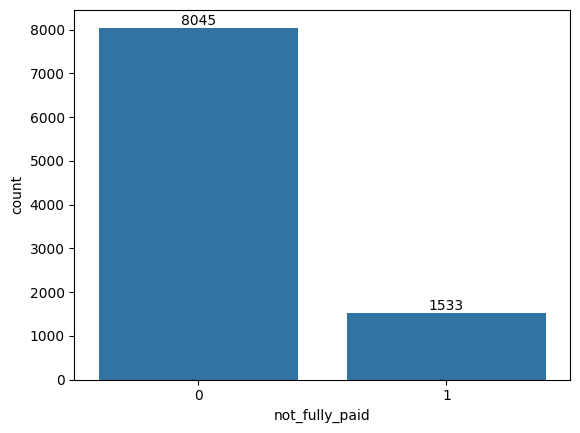

In [10]:
ax = sns.countplot(data= data, x="not_fully_paid");
ax.bar_label(ax.containers[-1], label_type='edge');


In [11]:
def describe_x(df):
    statistics = df.describe().T
    tm = data.select_dtypes(include=['float', 'int']).aggregate(func= stats.trim_mean, axis= 0, proportiontocut=0.1)
    statistics = statistics.assign(trim_mean = tm)
    statistics = statistics.assign(var = data.select_dtypes(include=['float', 'int']).var())
    statistics = statistics.assign(skewness = data.select_dtypes(include=['float', 'int']).skew())
    statistics = statistics.assign(kurtosis = data.select_dtypes(include=['float', 'int']).kurtosis())
    
    return statistics.loc[:, ['count', 'mean', 'trim_mean', 'var', 'std', 'skewness','kurtosis', 'min', '25%', '50%', '75%', 'max']]

describe_x(data)

,count,mean,trim_mean,var,std,skewness,kurtosis,min,25%,50%,75%,max
int_rate,9578.0,0.122640,0.122229,7.207607e-04,0.026847,0.164420,-0.224324,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,295.638150,4.287852e+04,207.071301,0.912522,0.137908,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log_annual_inc,9578.0,10.932117,10.931770,3.779947e-01,0.614813,0.028668,1.609004,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,12.594376,4.738904e+01,6.883970,0.023941,-0.900355,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,708.595772,1.441762e+03,37.970537,0.471260,-0.422312,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days_with_cr_line,9578.0,4560.767197,4303.643088,6.234661e+06,2496.930377,1.155748,1.937861,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol_bal,9578.0,16913.963876,10809.191153,1.139480e+09,33756.189557,11.161058,259.655203,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol_util,9578.0,46.799236,46.499530,8.418364e+02,29.014417,0.059985,-1.116467,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq_last_6mths,9578.0,1.577469,1.163622,4.841079e+00,2.200245,3.584151,26.288131,0.000000,0.000000,1.000000,2.000000,3.300000e+01
delinq_2yrs,9578.0,0.163708,0.021268,2.983507e-01,0.546215,6.061793,71.433182,0.000000,0.000000,0.000000,0.000000,1.300000e+01


In [12]:
data.describe(include="object")

,credit_policy,purpose
count,9578,9578
unique,2,7
top,1,debt_consolidation
freq,7710,3957


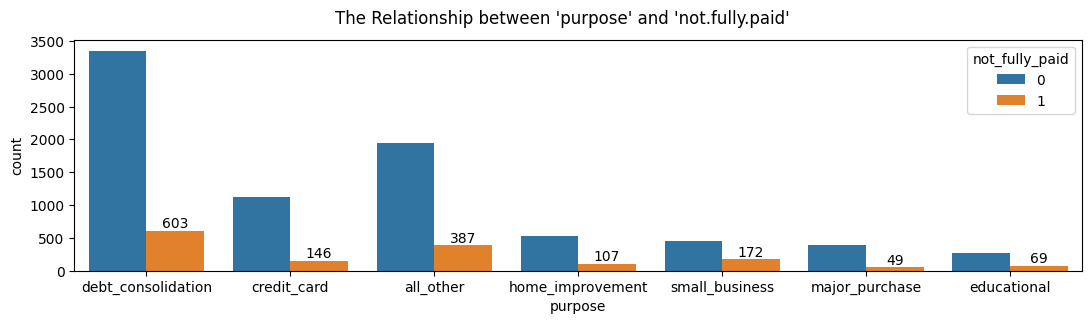

In [13]:
fig, ax = plt.subplots(figsize=(13, 3))
ax = sns.countplot(data=data, x='purpose', hue='not_fully_paid', ax=ax)
ax.bar_label(ax.containers[-1], label_type='edge')
fig.suptitle("The Relationship between 'purpose' and 'not.fully.paid'");

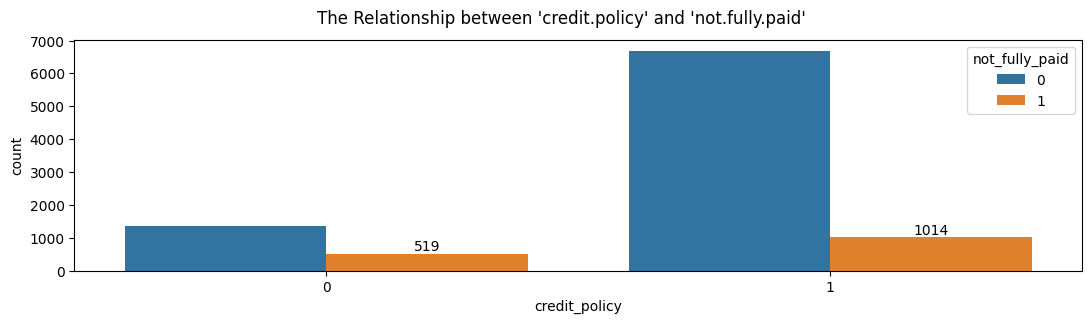

In [14]:
fig, ax = plt.subplots(figsize=(13, 3))
ax = sns.countplot(data=data, x='credit_policy', hue='not_fully_paid', ax=ax)
ax.bar_label(ax.containers[-1], label_type='edge')
fig.suptitle("The Relationship between 'credit.policy' and 'not.fully.paid'");

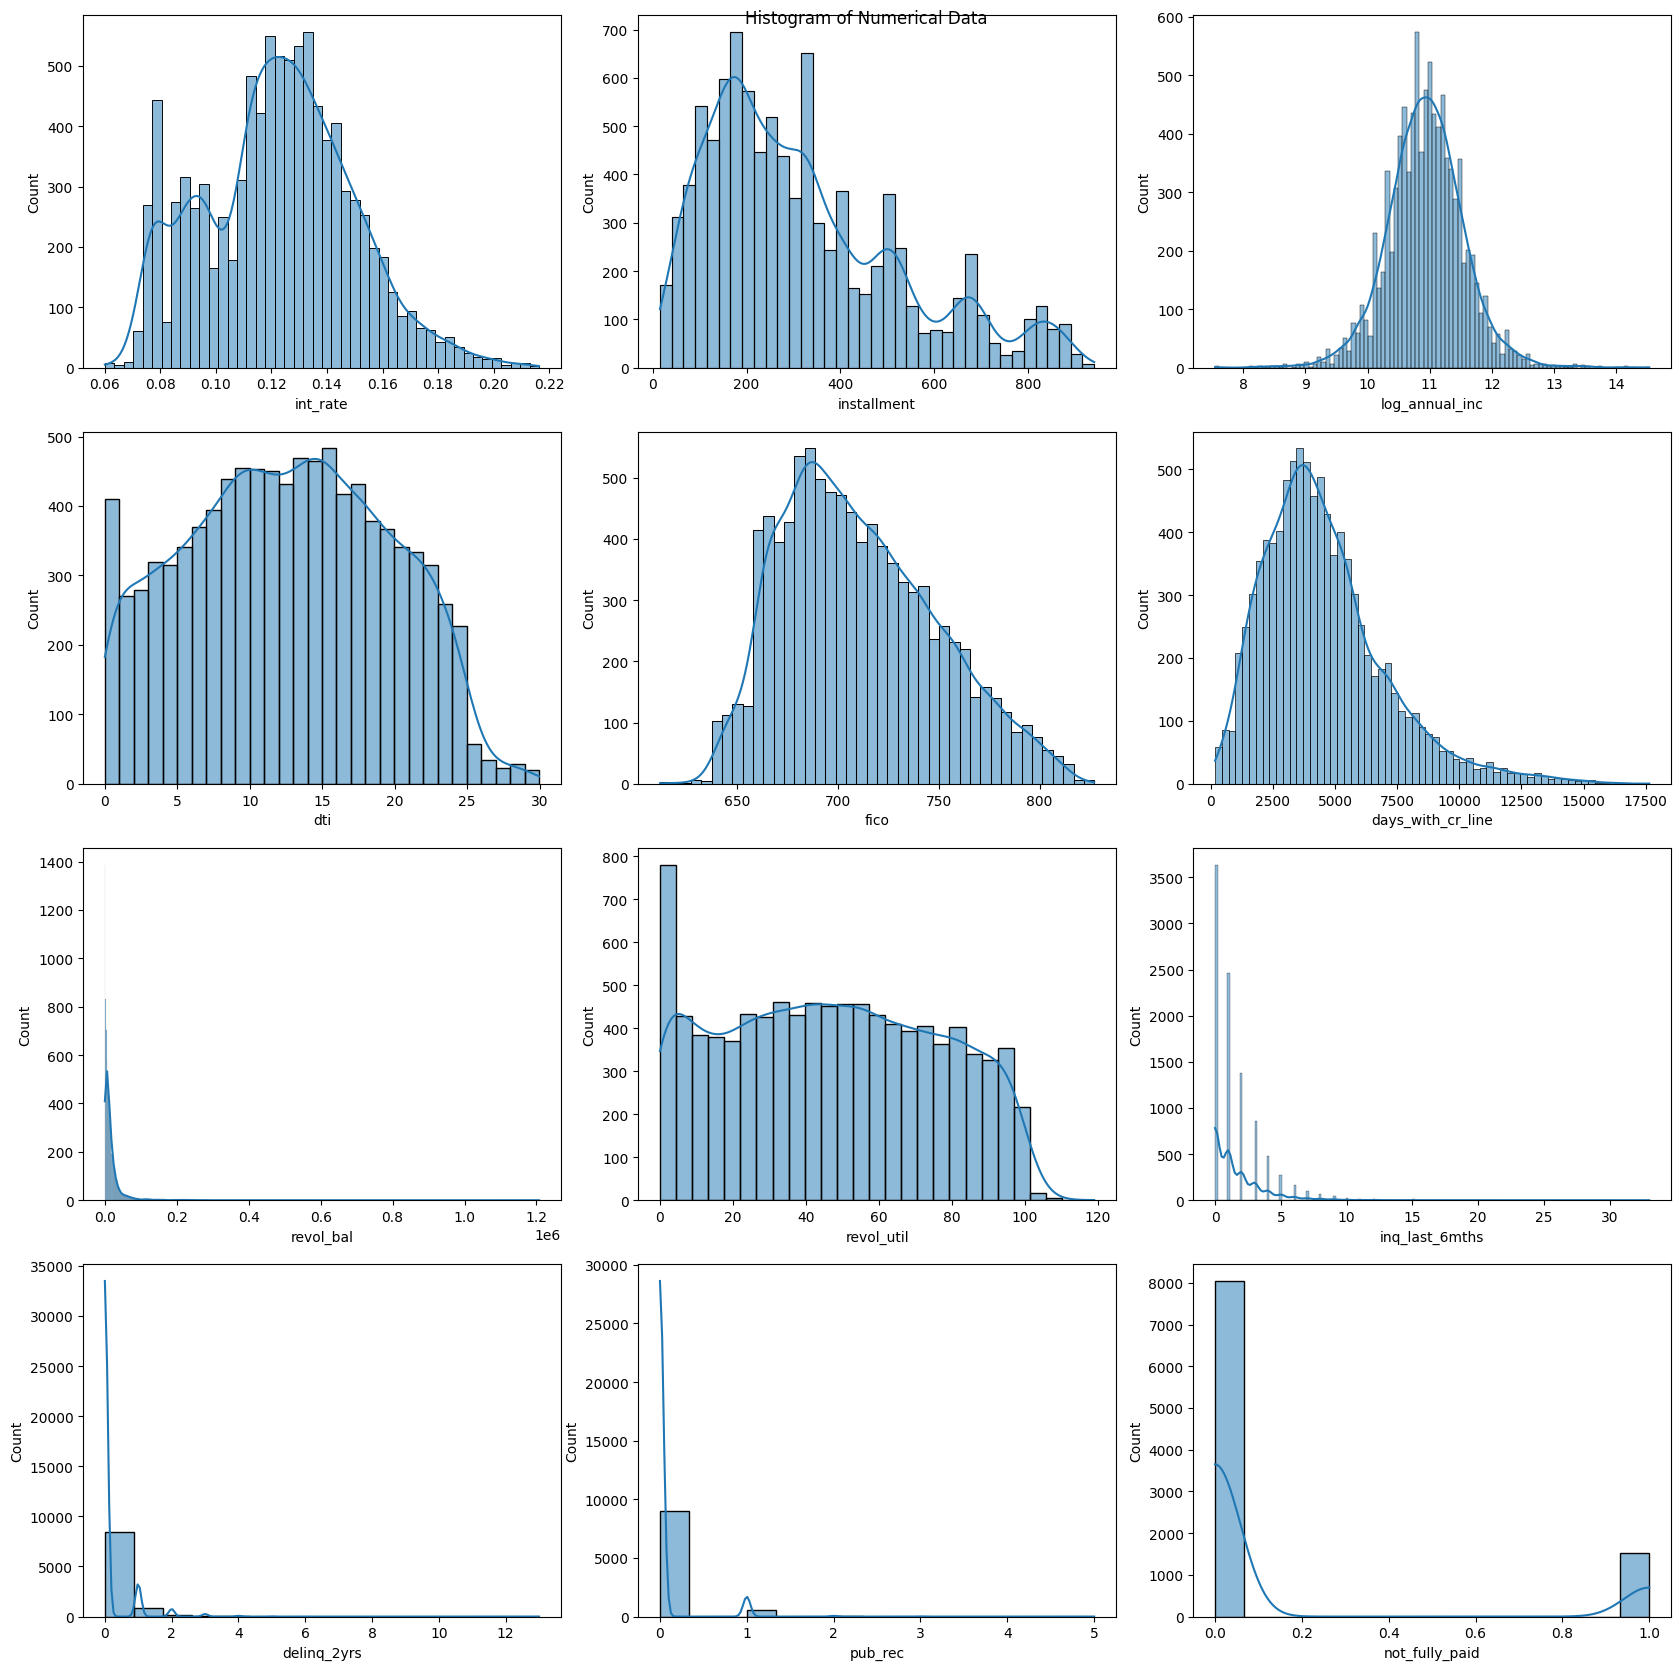

In [15]:
numeric_cols = list(data.select_dtypes(include= ['float', 'int']).columns)
nrows= 4
ncols = 3

fig , axes = plt.subplots(nrows= nrows, ncols= ncols, figsize= (17, 17));
fig.tight_layout(pad=2.5)
fig.suptitle("Histogram of Numerical Data")
df_col = 0
for i in range(nrows):
    for j in range(ncols):
        sns.histplot(data= data, x= numeric_cols[df_col], kde= True, ax= axes[i,j]);
        df_col += 1
        if df_col >= len(numeric_cols):
            break

<div  dir='rtl' style="text-align: justify;text-justify: inter-word;font-family:tahoma;font-size: 17px;">

 تبدیل لگاریتمی به ویژگی revol_bal  اعمال شده است. تبدیل لگاریتم تکنیکی رایج برای کاهش چولگی و افزایش تقارن توزیع داده‌ها است. این امر می‌تواند منجر به بهبود عملکرد الگوریتم‌های یادگیری ماشین و تحلیل‌های آماری شود 
 </div>

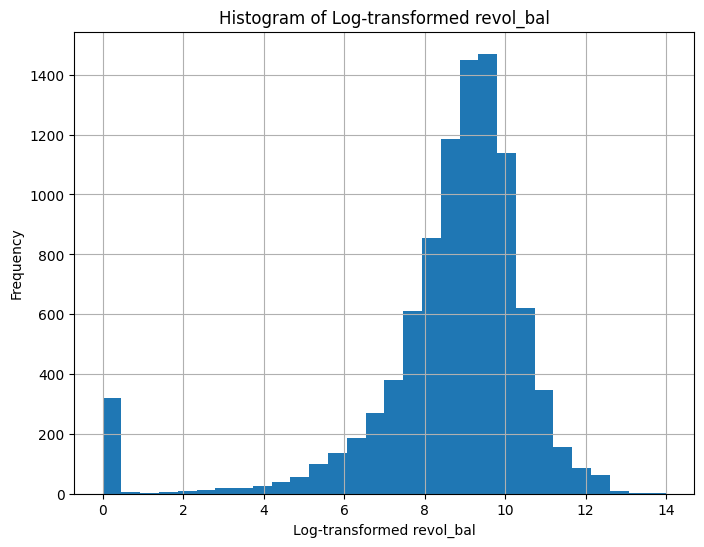

In [16]:
# Apply logarithm transformation to 'revol.bal'
data.insert(8, 'revol_bal_log', np.log1p(data['revol_bal']))

# Plot histogram of the transformed data
plt.figure(figsize=(8, 6))
data['revol_bal_log'].hist(bins=30)
plt.title('Histogram of Log-transformed revol_bal')
plt.xlabel('Log-transformed revol_bal')
plt.ylabel('Frequency')
plt.show()

In [17]:
data = data.drop(["revol_bal"], axis=1)

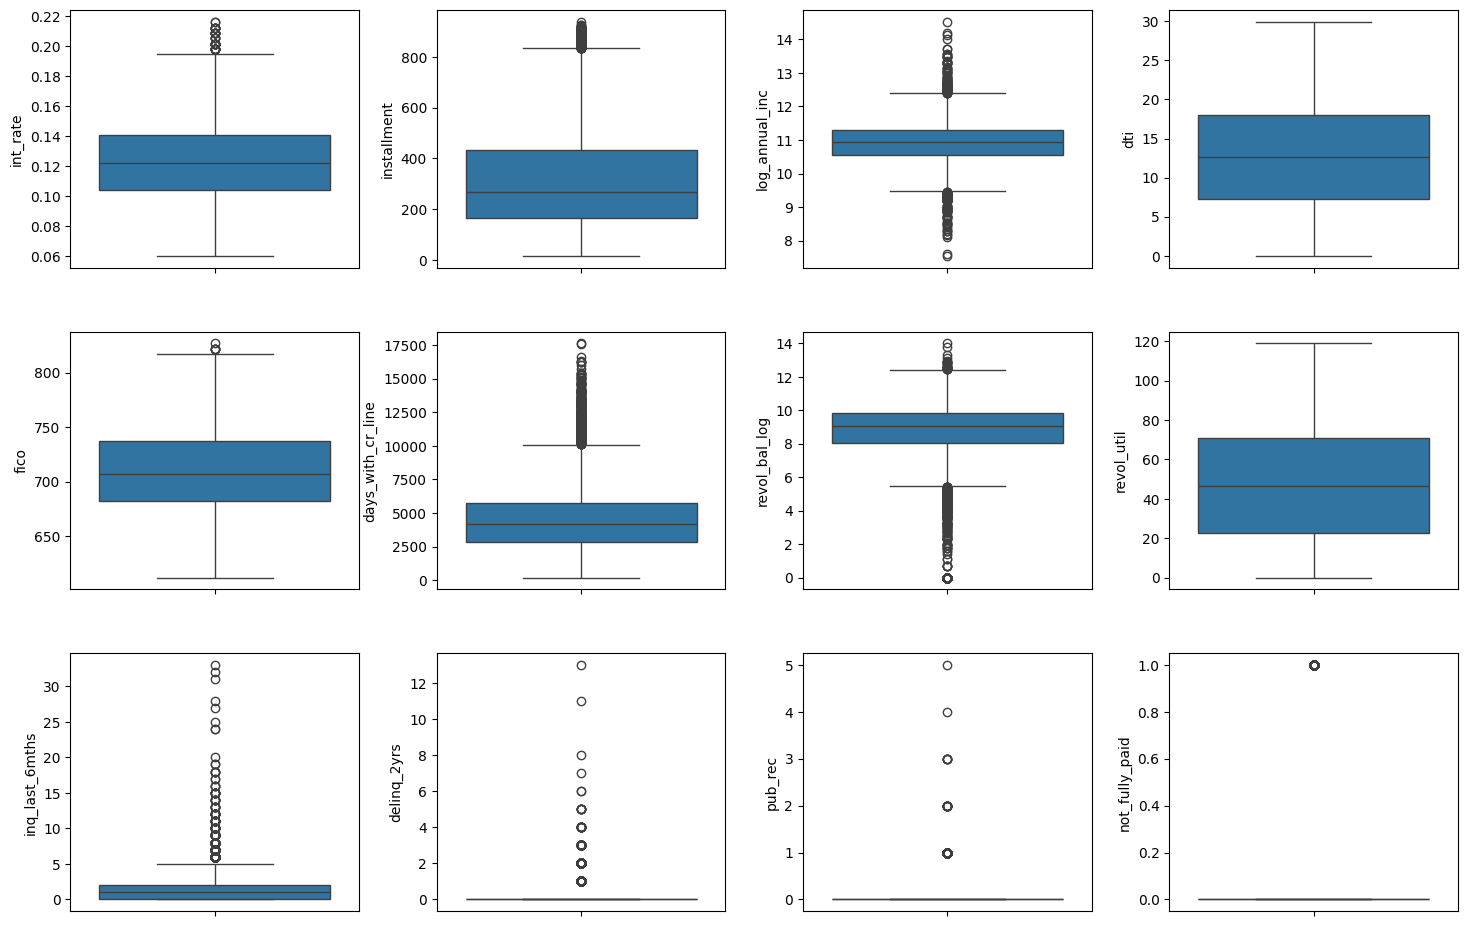

In [18]:
numeric_cols = list(data.select_dtypes(include= ['float', 'int']).columns)
# 3x4
nrows= 3
ncols = 4

fig , axes = plt.subplots(nrows= nrows, ncols= ncols, figsize= (15, 10))
fig.tight_layout(pad=2.5)
df_col = 0
for i in range(nrows):
    for j in range(ncols):
        sns.boxplot(data= data, y= numeric_cols[df_col], ax= axes[i,j]);
        df_col += 1
        if df_col >= len(numeric_cols):
            break

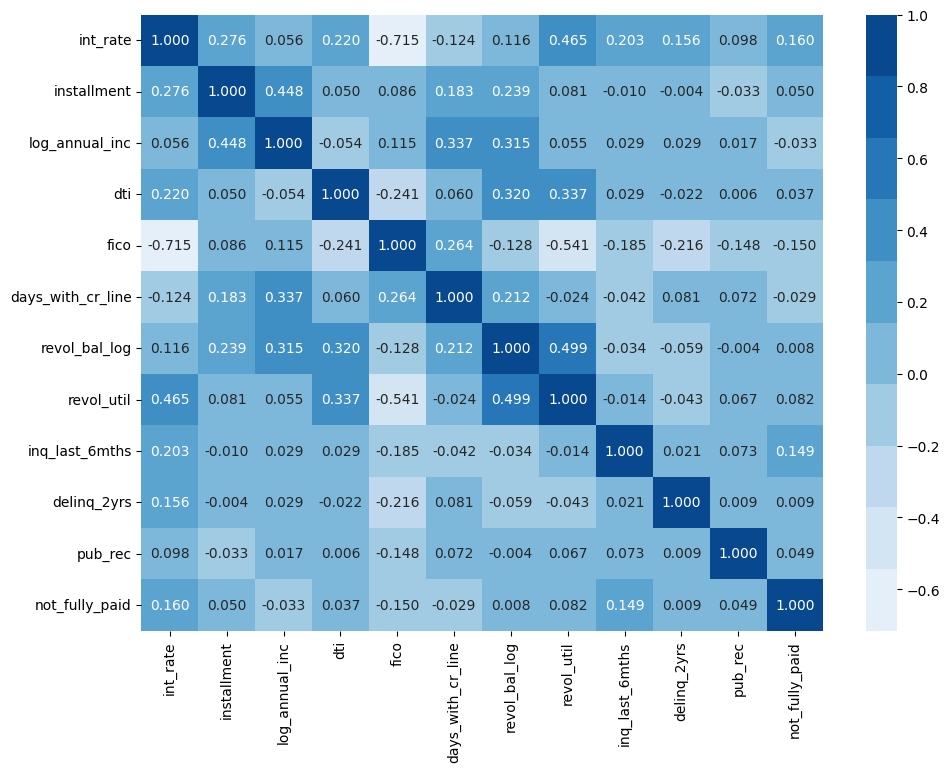

In [18]:
## correlation matrix
corr_mat = data.select_dtypes(include=['float', 'int']).corr()
cmap = sns.color_palette("Blues", 10)
f, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr_mat, annot=True, fmt='0.3f', cmap=cmap, ax=ax);
plt.show()

In [19]:
cor_arr_delay = data.select_dtypes(include=['float', 'int']).corr()['installment']
cor_arr_delay

int_rate             0.276140
installment          1.000000
log_annual_inc       0.448102
dti                  0.050202
fico                 0.086039
days_with_cr_line    0.183297
revol_bal_log        0.239425
revol_util           0.081356
inq_last_6mths      -0.010419
delinq_2yrs         -0.004368
pub_rec             -0.032760
not_fully_paid       0.049955
Name: installment, dtype: float64

<a id="5"></a>

# <p style="background-color:#3a8bb8; padding:25px; font-family:Georgia ; color:#f3b88c; font-size:150%; text-align:center;  border-radius:10% / 100%;">Data Preprocessing</p>

⬆️ [Tabel of Contents](#contents_tabel)

### train-test split

In [20]:
data_train, data_test = train_test_split(data, random_state=364, test_size=0.2)

<div  dir='rtl' style="text-align: justify;text-justify: inter-word;font-family:tahoma;font-size: 17px;">
داده های آموزشی بالانس نیستند:
</div>

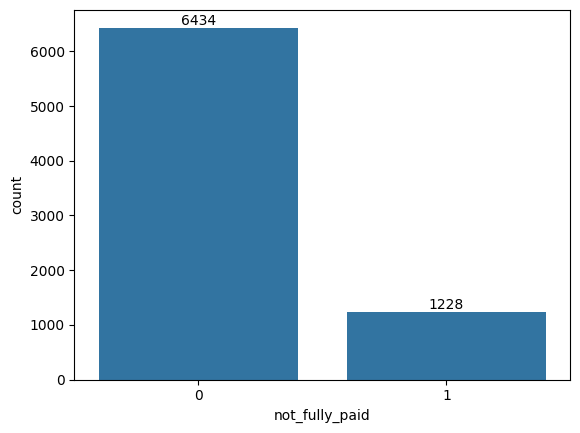

In [21]:
ax = sns.countplot(data= data_train, x="not_fully_paid");
ax.bar_label(ax.containers[-1], label_type='edge');

In [22]:
## Converting train and test data to numpy arrays
X_train = data_train.iloc[:,:-1].values
y_train = data_train.iloc[:,-1].values

X_test = data_test.iloc[:,:-1].values
y_test = data_test.iloc[:,-1].values

## checking data to ensure code correctness and bug-free execution
print(X_train.shape)
print(y_train.shape)
print(X_train[0,:])
print(y_train[0])

(7662, 13)
(7662,)
[1 'major_purchase' 0.1311 202.47 11.00209984 2.82 687 3392.041667
 8.380685946761574 58.9 2 2 0]
0


<div  dir='rtl' style="text-align: justify;text-justify: inter-word;font-family:tahoma;font-size: 17px;">
در یادگیری ماشین، زمانی که با داده های نامتعادل سروکار داریم، یک چالش رایج این است که الگوریتم های یادگیری ماشین تمایل دارند به سمت کلاس اکثریت متمایل شوند و کلاس اقلیت را به درستی طبقه بندی نکنند.
<br>
نمونه گیری بیش از حد تصادفی (Random Oversampling) یک تکنیک نمونه گیری مجدد است که برای مقابله با این مشکل استفاده می شود. این روش با ایجاد نمونه های مصنوعی از داده های موجود در کلاس اقلیت، مجموعه داده را به طور مصنوعی متعادل می کند.
<br>
 روش SMOTE پیچیده تر است، اما نتایج بهتری را نیز ارائه می دهد. SMOTE با شناسایی نقاط همسایه نزدیک به هر نقطه داده در کلاس اقلیت و سپس ایجاد نمونه های جدید در امتداد خطوط بین این نقاط، نمونه های مصنوعی جدیدی ایجاد می کند.
</div>

<div  dir='rtl' style="text-align: justify;text-justify: inter-word;font-family:tahoma;font-size: 17px;">
داده های آموزشی را بالانس می کنیم:
</div>

### __Balancing the Train Data using Random Over Sampling__

In [23]:
# print(np.unique(y_train, return_counts=True))

# ros = RandomOverSampler()
# X_train, y_train = ros.fit_resample(X_train, y_train)

# print(np.unique(y_train, return_counts=True))

# ## checking data to ensure code correctness and bug-free execution
# print(X_train.shape)
# print(y_train.shape)
# print(X_train[0,:])
# print(y_train[0])

### __Balancing the Train Data using SMOTE__

In [24]:
print("Before Balancing:", np.unique(y_train, return_counts=True))

smote = SMOTENC([0, 1])
X_train, y_train = smote.fit_resample(X_train, y_train)

print("After Balancing:", np.unique(y_train, return_counts=True))

## checking data to ensure code correctness and bug-free execution
print(X_train.shape)
print(y_train.shape)
print(X_train[0,:])
print(y_train[0])

Before Balancing: (array([0, 1], dtype=int64), array([6434, 1228], dtype=int64))
After Balancing: (array([0, 1], dtype=int64), array([6434, 6434], dtype=int64))
(12868, 13)
(12868,)
[1 'major_purchase' 0.1311 202.47 11.00209984 2.82 687.0 3392.041667
 8.380685946761574 58.9 2.0 2.0 0.0]
0


### 1. One-Hot Encoding - 'credit.policy' and 'purpose' columns

<div  dir='rtl' style="text-align: justify;text-justify: inter-word;font-family:tahoma;font-size: 17px;">
دو ستون غیر عددی داریم که باید One-Hot Encoding بشوند:
</div>

In [25]:
print(np.unique(X_train[:, 1]))
print(np.unique(X_train[:, 0]))

['all_other' 'credit_card' 'debt_consolidation' 'educational'
 'home_improvement' 'major_purchase' 'small_business']
[0 1]


In [26]:
ct_ohe = ColumnTransformer(transformers= [('one_hot_encoder', OneHotEncoder(), [0, 1])],
                                               remainder='passthrough', sparse_threshold=0)

X_train = ct_ohe.fit_transform(X_train)

## checking data to ensure code correctness and bug-free execution
print(X_train.shape)
print(X_train[0,:])

(12868, 20)
[0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.1311 202.47 11.00209984 2.82 687.0
 3392.041667 8.380685946761574 58.9 2.0 2.0 0.0]


### 2. Scaling

In [27]:
# std_scaler = StandardScaler()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

## checking data to ensure code correctness and bug-free execution
print(X_train.shape)
print(X_train[0,:])

(12868, 20)
[0.         1.         0.         0.         0.         0.
 0.         1.         0.         0.45460358 0.20206172 0.49486764
 0.0941255  0.34883721 0.18396422 0.59845172 0.49495798 0.0625
 0.15384615 0.        ]


### Saving transformers:

In [28]:
## Save transformer to H.D.D.:

with open('./transformers/ct_ohe.h5', 'wb') as f:
    pickle.dump(ct_ohe, f)

with open('./transformers/std_scaler.h5', 'wb') as f:
    pickle.dump(scaler, f)

<a id="6"></a>

# <p style="background-color:#3a8bb8; padding:25px; font-family:Georgia ; color:#f3b88c; font-size:150%; text-align:center;  border-radius:10% / 100%;">Model Building</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="font-family:'Georgia'; font-size:125%;">
    <p><strong>Model Training Methods:</strong></p>
    <ol>
        <li>K-Nearest Neighbors</li>
        <li>Support Vector Machine</li>
        <li>Random Forest</li>
        <li>XGBoost</li>
    </ol>
</div>

<a id="7"></a>

# <p style="background-color:#3a8bb8; padding:25px; font-family:Georgia ; color:#f3b88c; font-size:150%; text-align:center;  border-radius:10% / 100%;">K-Nearest Neighbors</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [29]:
knn_model = KNeighborsClassifier()
knn_model

KNeighborsClassifier()

In [34]:
rs_param_grid = {
    'n_neighbors': list((range(3,12))),
    }

knn_rs = RandomizedSearchCV(estimator=knn_model, param_distributions=rs_param_grid, 
                                cv=3, n_iter=5, verbose=1)
knn_rs.fit(X_train, y_train)
print("Best parameters found: ", knn_rs.best_params_)
print("Best accuracy found: ", knn_rs.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


Best parameters found:  {'n_neighbors': 3}
Best accuracy found:  0.7120795087920292


In [35]:
# Initialize the knn Classifier using optimal hyperparameters
knn_model = KNeighborsClassifier(n_neighbors=3)
# Train the model on the whole dataset
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      6434
           1       0.83      0.92      0.87      6434

    accuracy                           0.87     12868
   macro avg       0.87      0.87      0.87     12868
weighted avg       0.87      0.87      0.87     12868



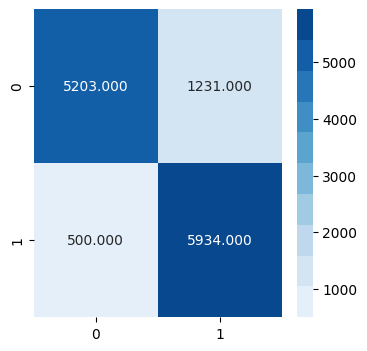

In [36]:
# predict on train dataset
y_pred = knn_model.predict(X_train)
y_true = y_train

print(metrics.classification_report(y_true, y_pred))

cmap = sns.color_palette("Blues", 10)
f, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(metrics.confusion_matrix(y_true, y_pred), annot=True, fmt='0.3f', cmap=cmap, ax=ax);
plt.show()

<a id="8"></a>

# <p style="background-color:#3a8bb8; padding:25px; font-family:Georgia ; color:#f3b88c; font-size:150%; text-align:center;  border-radius:10% / 100%;">Support Vector Machine</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [37]:
svm_model = SVC(random_state=360, C=0.5)
svm_model.fit(X_train, y_train)

SVC(C=0.5, random_state=360)

              precision    recall  f1-score   support

           0       0.72      0.57      0.63      6434
           1       0.64      0.77      0.70      6434

    accuracy                           0.67     12868
   macro avg       0.68      0.67      0.67     12868
weighted avg       0.68      0.67      0.67     12868



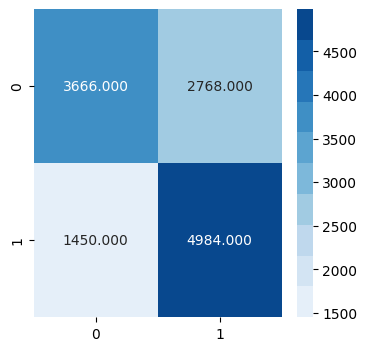

In [38]:
# predict on train dataset
y_pred = svm_model.predict(X_train)
y_true = y_train

print(metrics.classification_report(y_true, y_pred))

cmap = sns.color_palette("Blues", 10)
f, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(metrics.confusion_matrix(y_true, y_pred), annot=True, fmt='0.3f', cmap=cmap, ax=ax);
plt.show()

<a id="9"></a>

# <p style="background-color:#3a8bb8; padding:25px; font-family:Georgia ; color:#f3b88c; font-size:150%; text-align:center;  border-radius:10% / 100%;">Random Forest</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div  dir='rtl' style="text-align: justify;text-justify: inter-word;font-family:tahoma;font-size: 17px;">
به منظور جلوگیری از overfit شدن، پارامتر min_samples_leaf را مقداردهی کرده ایم. اگر در نودی کمتر از این مقدار داده قرار بگیرد، 
گسترش درخت در آن شاخه را ادامه نمی دهد
<br>
اگر با مقدار پیشفرض که برابر 1 است مدل را آموزش بدهیم، دقت روی داده ی آموزشی 1 خواهد بود
</div>

In [39]:
rfc_model = RandomForestClassifier(n_estimators=800, min_samples_leaf= 3, random_state=360)
rfc_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=3, n_estimators=800, random_state=360)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6434
           1       1.00      0.96      0.98      6434

    accuracy                           0.98     12868
   macro avg       0.98      0.98      0.98     12868
weighted avg       0.98      0.98      0.98     12868



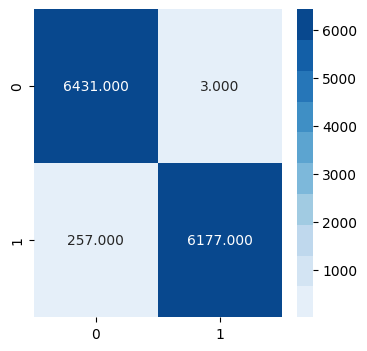

In [40]:
# predict on train dataset
y_pred = rfc_model.predict(X_train)
y_true = y_train

print(metrics.classification_report(y_true, y_pred))

cmap = sns.color_palette("Blues", 10)
f, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(metrics.confusion_matrix(y_true, y_pred), annot=True, fmt='0.3f', cmap=cmap, ax=ax);
plt.show()

<a id="10"></a>

# <p style="background-color:#3a8bb8; padding:25px; font-family:Georgia ; color:#f3b88c; font-size:150%; text-align:center;  border-radius:10% / 100%;">XGBoost</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [41]:
xgb_model = XGBClassifier(random_state=360)
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=360, ...)

In [42]:
rs_param_grid = {
    'max_depth': list((range(3,12))),
    'alpha': [0,0.001, 0.01,0.1,1],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.5,0.75,1],
    'learning_rate': np.linspace(0.01,0.5, 10),
    'n_estimators': [10, 25, 70, 110, 200]
    }

xgb_rs = RandomizedSearchCV(estimator=xgb_model,param_distributions=rs_param_grid, 
                                cv=3, n_iter=5, verbose=1, random_state=360)
xgb_rs.fit(X_train, y_train)
print("Best parameters found: ", xgb_rs.best_params_)
print("Best accuracy found: ", xgb_rs.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


Best parameters found:  {'subsample': 1, 'n_estimators': 70, 'max_depth': 6, 'learning_rate': 0.44555555555555554, 'gamma': 0, 'alpha': 0.1}
Best accuracy found:  0.8557773694402279


In [43]:
# Initialize the XGBoost Classifier using optimal hyperparameters
xgb_model = XGBClassifier(max_depth=6,
                        learning_rate=0.44555555555555554,
                        subsample=1 ,
                        n_estimators=70,  
                        alpha=0.1 ,
                        gamma=0,
                        random_state=360)
# Train the model on the whole dataset
xgb_model.fit(X_train, y_train)


XGBClassifier(alpha=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.44555555555555554,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=70, n_jobs=None,
              num_parallel_tree=None, ...)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6434
           1       1.00      0.95      0.98      6434

    accuracy                           0.98     12868
   macro avg       0.98      0.98      0.98     12868
weighted avg       0.98      0.98      0.98     12868



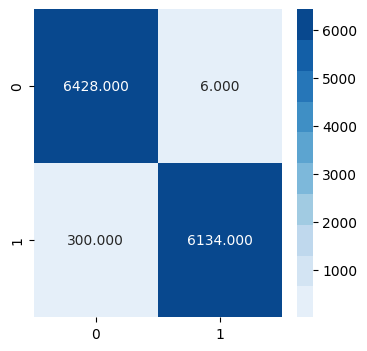

In [44]:
# predict on train dataset
y_pred = xgb_model.predict(X_train)
y_true = y_train

print(metrics.classification_report(y_true, y_pred))

cmap = sns.color_palette("Blues", 10)
f, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(metrics.confusion_matrix(y_true, y_pred), annot=True, fmt='0.3f', cmap=cmap, ax=ax);
plt.show()

### Saving Models to H.D.D.

In [45]:
with open('./models/knn_model.pkl', 'wb') as f:
    pickle.dump(knn_model, f)

with open('./models/svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

with open('./models/rfc_model.pkl', 'wb') as f:
    pickle.dump(rfc_model, f)  

with open('./models/xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)  

<a id="11"></a>

# <p style="background-color:#3a8bb8; padding:25px; font-family:Georgia ; color:#f3b88c; font-size:150%; text-align:center;  border-radius:10% / 100%;">Evaluating Model</p>

⬆️ [Tabel of Contents](#contents_tabel)

### Loading transformers and classifiers

In [47]:
## Loads transformers

with open('./transformers/ct_ohe.h5', 'rb') as f:
    ct_ohe = pickle.load(f)

with open('./transformers/std_scaler.h5', 'rb') as f:
    std_scaler = pickle.load(f)
    

### Load Classifiers:
with open('./models/knn_model.pkl', 'rb') as f:
    knn_model = pickle.load(f)

with open('./models/svm_model.pkl', 'rb') as f:
    svm_model = pickle.load(f)

with open('./models/rfc_model.pkl', 'rb') as f:
    rfc_model = pickle.load(f)

with open('./models/xgb_model.pkl', 'rb') as f:
    xgb_model = pickle.load(f)


### Preparing X_test and y_test:

In [48]:
print(X_test.shape, y_test.shape)

X_test = ct_ohe.transform(X_test)
X_test = std_scaler.transform(X_test)

print(X_test.shape, y_test.shape)

(1916, 13) (1916,)
(1916, 20) (1916,)


### __KNN Model's results on Test data__

              precision    recall  f1-score   support

           0       0.87      0.67      0.76      1611
           1       0.21      0.46      0.29       305

    accuracy                           0.64      1916
   macro avg       0.54      0.57      0.53      1916
weighted avg       0.76      0.64      0.68      1916



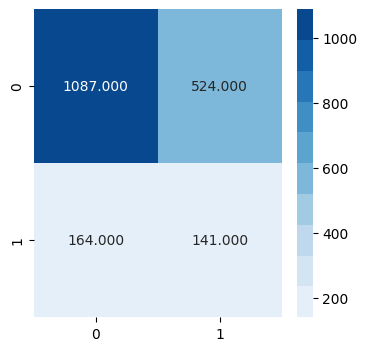

In [49]:
# predict on test dataset
y_pred = knn_model.predict(X_test)
y_true = y_test

print(metrics.classification_report(y_true, y_pred))
knn_acc = metrics.accuracy_score(y_true,y_pred)
knn_f1 = metrics.f1_score(y_true,y_pred, average='macro')

cmap = sns.color_palette("Blues", 10)
f, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(metrics.confusion_matrix(y_true, y_pred), annot=True, fmt='0.3f', cmap=cmap, ax=ax);
plt.show()

### __SVM Model's results on Test data__

              precision    recall  f1-score   support

           0       0.88      0.57      0.69      1611
           1       0.20      0.57      0.30       305

    accuracy                           0.57      1916
   macro avg       0.54      0.57      0.49      1916
weighted avg       0.77      0.57      0.63      1916



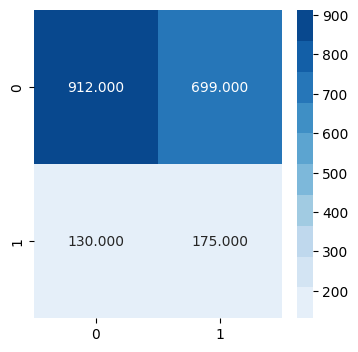

In [50]:
# predict on test dataset
y_pred = svm_model.predict(X_test)
y_true = y_test

print(metrics.classification_report(y_true, y_pred))
svm_acc = metrics.accuracy_score(y_true,y_pred)
svm_f1 = metrics.f1_score(y_true,y_pred, average='macro')

cmap = sns.color_palette("Blues", 10)
f, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(metrics.confusion_matrix(y_true, y_pred), annot=True, fmt='0.3f', cmap=cmap, ax=ax);
plt.show()

### __Random Forest Model's results on Test data__

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1611
           1       0.34      0.16      0.21       305

    accuracy                           0.82      1916
   macro avg       0.60      0.55      0.56      1916
weighted avg       0.77      0.82      0.79      1916



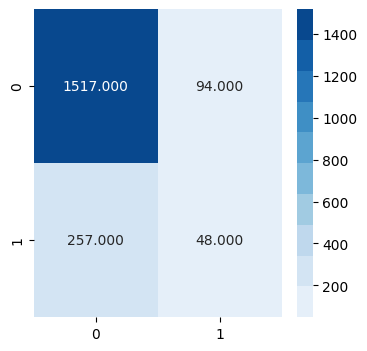

In [51]:
# predict on test dataset
y_pred = rfc_model.predict(X_test)
y_true = y_test

print(metrics.classification_report(y_true, y_pred))
rfc_acc = metrics.accuracy_score(y_true,y_pred)
rfc_f1 = metrics.f1_score(y_true,y_pred, average='macro')

cmap = sns.color_palette("Blues", 10)
f, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(metrics.confusion_matrix(y_true, y_pred), annot=True, fmt='0.3f', cmap=cmap, ax=ax);
plt.show()

### __XGB Model's results on Test data__

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1611
           1       0.28      0.15      0.19       305

    accuracy                           0.80      1916
   macro avg       0.57      0.54      0.54      1916
weighted avg       0.76      0.80      0.78      1916



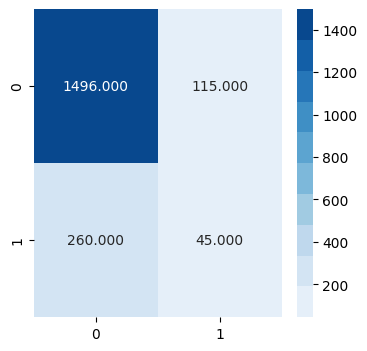

In [52]:
# predict on test dataset
y_pred = xgb_model.predict(X_test)
y_true = y_test

print(metrics.classification_report(y_true, y_pred))
xgb_acc = metrics.accuracy_score(y_true,y_pred)
xgb_f1 = metrics.f1_score(y_true,y_pred, average='macro')

cmap = sns.color_palette("Blues", 10)
f, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(metrics.confusion_matrix(y_true, y_pred), annot=True, fmt='0.3f', cmap=cmap, ax=ax);
plt.show()

<a id="12"></a>

# <p style="background-color:#3a8bb8; padding:25px; font-family:Georgia ; color:#f3b88c; font-size:150%; text-align:center;  border-radius:10% / 100%;">Neural Network</p>

⬆️ [Tabel of Contents](#contents_tabel)

## __Deep Learning Approach__

### __Defining Model__

In [53]:
model = Sequential([
    Dense(25, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(45, activation="relu"),
    Dense(65, activation="relu"),
    Dense(35, activation="relu"),
    Dense(15, activation="relu"),
    Dense(1, activation="sigmoid")
    # Dense(2, activation="softmax")
])
model.summary()

c:\Users\almas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │           525 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 45)             │         1,170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 65)             │         2,990 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 35)             │         2,310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 15)             │           540 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,551 (29.50 KB)

 Trainable params: 7,551 (29.50 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
plot_model(model, show_layer_activations=True, show_shapes=True)

### __Compiling Model__

In [56]:
model.compile(optimizer=Adam(0.001), loss='BinaryCrossentropy', metrics=['BinaryAccuracy']) # Binary
# model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=CategoricalAccuracy()) # Categorical

In [62]:
## Defining callbacks
# es = EarlyStopping(monitor='val_loss', mode='min', patience=20)
# rlrop = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, min_lr=0.001)
mch = ModelCheckpoint('./models/nn_model.keras', monitor='val_loss', mode='min', save_best_only=True)

### __Fitting Model__

In [67]:
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), callbacks=[mch],  batch_size=128) 

Epoch 1/150
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - BinaryAccuracy: 0.7840 - loss: 0.4365 - val_BinaryAccuracy: 0.7009 - val_loss: 0.6223
Epoch 2/150
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - BinaryAccuracy: 0.7802 - loss: 0.4523 - val_BinaryAccuracy: 0.6378 - val_loss: 0.7060
Epoch 3/150
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - BinaryAccuracy: 0.7904 - loss: 0.4334 - val_BinaryAccuracy: 0.6164 - val_loss: 0.7477
Epoch 4/150


101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - BinaryAccuracy: 0.7815 - loss: 0.4484 - val_BinaryAccuracy: 0.6033 - val_loss: 0.7611
Epoch 5/150
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - BinaryAccuracy: 0.7882 - loss: 0.4334 - val_BinaryAccuracy: 0.6550 - val_loss: 0.6991
Epoch 6/150
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - BinaryAccuracy: 0.7837 - loss: 0.4372 - val_BinaryAccuracy: 0.6086 - val_loss: 0.7758
Epoch 7/150
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - BinaryAccuracy: 0.7905 - loss: 0.4288 - val_BinaryAccuracy: 0.6033 - val_loss: 0.7776
Epoch 8/150
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - BinaryAccuracy: 0.7916 - loss: 0.4294 - val_BinaryAccuracy: 0.6863 - val_loss: 0.6660
Epoch 9/150
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - BinaryAccuracy: 0.7889 - loss: 0.4341 - val_BinaryAccuracy: 0.6775 - val_loss: 0.6851
Epoch 10/150
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - BinaryAccuracy: 0.7954 - loss: 0.4256 - val_BinaryAccuracy: 0.6566 - val_loss: 0.7024
Epoch 11/150
101/101

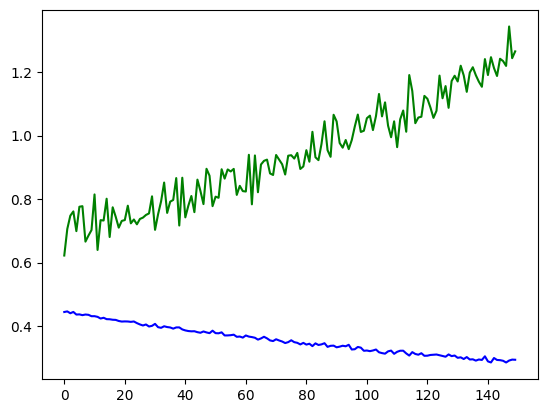

In [68]:
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='green')

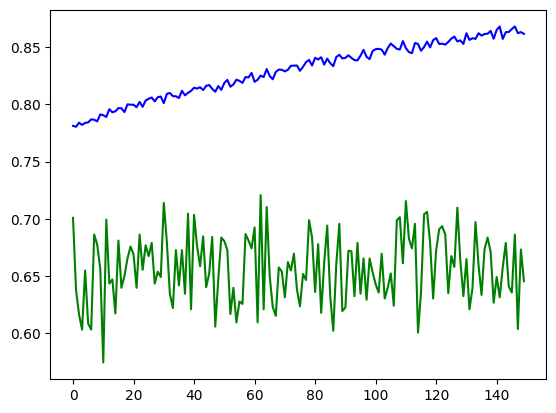

In [69]:
plt.plot(history.history['BinaryAccuracy'], color='blue')
plt.plot(history.history['val_BinaryAccuracy'], color='green')

### __Evaluating Model__

In [70]:
from tensorflow.keras.models import load_model
nn_model = load_model('./models/nn_model.keras')
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │           525 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 45)             │         1,170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 65)             │         2,990 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 35)             │         2,310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 15)             │           540 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,655 (88.50 KB)

 Trainable params: 7,551 (29.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,104 (59.00 KB)

In [71]:
y_pred = model.predict(X_test)
y_pred.shape

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step


(1916, 1)

In [72]:
## Threshold: Binary
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0

# ## Threshold: Categorical
# y_pred_n1 = y_pred[:,1]
# y_pred_n1[y_pred_n1 > 0.5] = 1
# y_pred_n1[y_pred_n1 < 0.5] = 0
# y_pred = y_pred_n1

              precision    recall  f1-score   support

           0       0.87      0.68      0.76      1611
           1       0.22      0.49      0.30       305

    accuracy                           0.65      1916
   macro avg       0.55      0.58      0.53      1916
weighted avg       0.77      0.65      0.69      1916



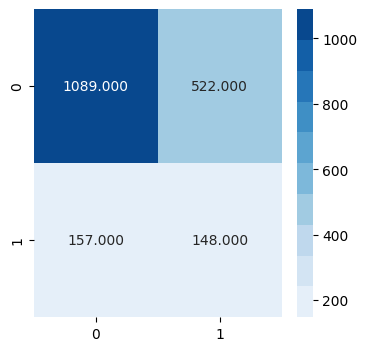

In [73]:
# predict on test dataset
y_true = data_test.iloc[:,-1].values

print(metrics.classification_report(y_true, y_pred))
nn_acc = metrics.accuracy_score(y_true, y_pred)
nn_f1 = metrics.f1_score(y_true, y_pred, average='macro')

cmap = sns.color_palette("Blues", 10)
f, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(metrics.confusion_matrix(y_true, y_pred), annot=True, fmt='0.3f', ax=ax, cmap=cmap);
plt.show()

<a id="13"></a>

# <p style="background-color:#3a8bb8; padding:25px; font-family:Georgia ; color:#f3b88c; font-size:150%; text-align:center;  border-radius:10% / 100%;">Model Comparison</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [75]:
compare = pd.DataFrame({'Model': ['KNN', 'SVM','RF', 'XGBoost', 'NN'], 
                        'Accuracy': [knn_acc*100, svm_acc*100, rfc_acc*100, xgb_acc*100, nn_acc*100 ],
                        'f1-score (macro avg)': [knn_f1*100, svm_f1*100, rfc_f1*100, xgb_f1*100, nn_f1*100 ]})
compare.sort_values(by='f1-score (macro avg)', ascending=False)

,Model,Accuracy,f1-score (macro avg)
2,RF,81.680585,55.553617
3,XGBoost,80.427975,54.108664
4,NN,64.561587,53.296393
0,KNN,64.091858,52.516516
1,SVM,56.732777,49.219265
